# KMeans Clustering for Customer Data

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme()
sns.set_style('whitegrid')
sns.set_palette(['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'])

import plotly as py
import plotly.graph_objs as go

# import warnings
# warnings.filterwarnings('ignore')

## Data Preprocessing and EDA

In [2]:
df = pd.read_csv('datasets/segmented_customers.csv')
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  
0        4  
1        3  
2        4  
3        3  
4        4

In [3]:
df['cluster'].unique()

array([4, 3, 0, 5, 1, 2], dtype=int64)

In [4]:
df['cluster'].value_counts()

cluster
0    45
1    39
5    38
2    35
3    22
4    21
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [6]:
df.describe().T

count     mean        std   min    25%    50%     75%  \
CustomerID              200.0  100.500  57.879185   1.0  50.75  100.5  150.25   
Age                     200.0   38.850  13.969007  18.0  28.75   36.0   49.00   
Annual Income (k$)      200.0   60.560  26.264721  15.0  41.50   61.5   78.00   
Spending Score (1-100)  200.0   50.200  25.823522   1.0  34.75   50.0   73.00   
cluster                 200.0    2.245   1.814230   0.0   1.00    2.0    4.00   

                          max  
CustomerID              200.0  
Age                      70.0  
Annual Income (k$)      137.0  
Spending Score (1-100)   99.0  
cluster                   5.0

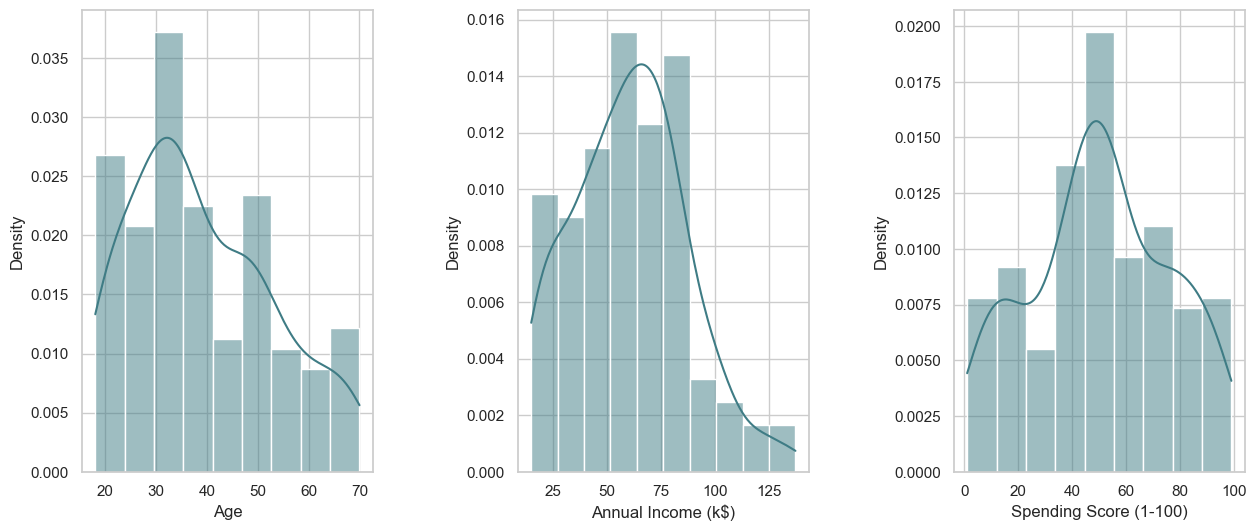

In [7]:
plt.figure(1 , figsize = (15, 6))
for idx, x in enumerate(['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']):
    idx += 1;   plt.subplot(1 , 3 , idx);   plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.histplot(df[x], kde=True, stat="density");

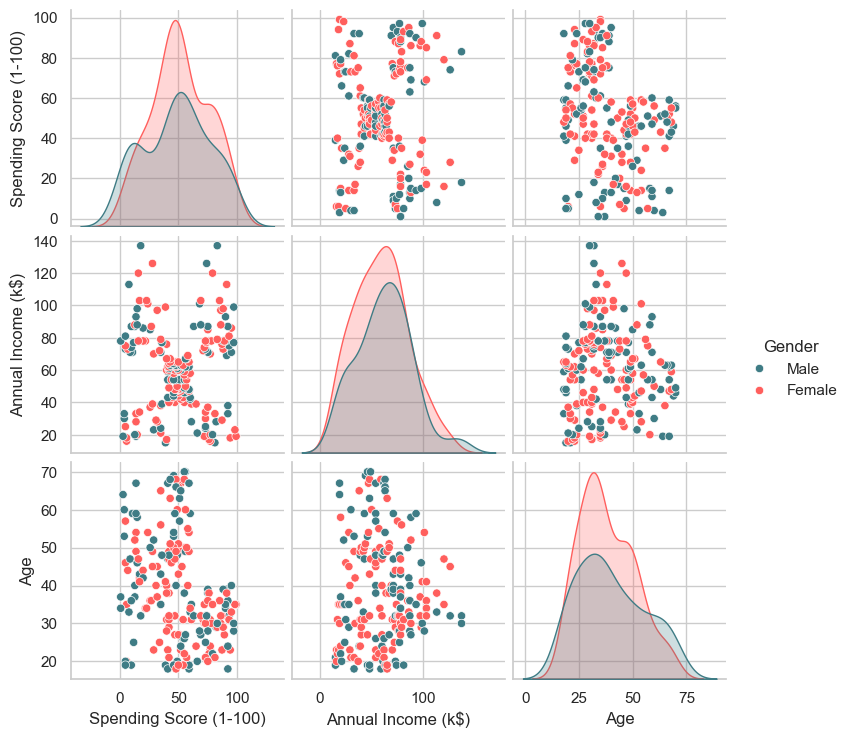

In [8]:
sns.pairplot(df, vars = ['Spending Score (1-100)', 'Annual Income (k$)', 'Age'], hue = "Gender");

## 2D Clustering based on Annual Income and Spending Score

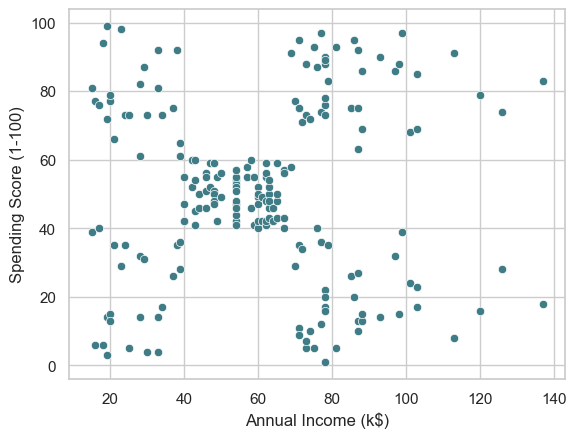

In [9]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)');

### Applying K-Means

In [10]:
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values

In [11]:
X1.shape

(200, 2)

In [12]:
from sklearn.cluster import KMeans

km5 = KMeans(n_clusters=5, n_init=10, max_iter=300, tol=0.0001, random_state=111).fit(X1)

In [13]:
km5.labels_

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 4,
       3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 2, 0, 4, 0, 2, 0, 2, 0,
       4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 4, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [14]:
km5.cluster_centers_

array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

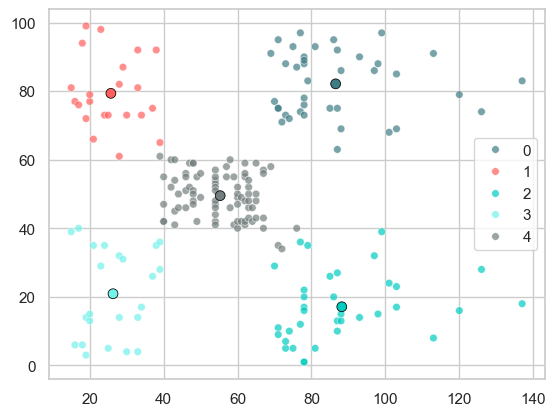

In [15]:
ax = sns.scatterplot(x=X1[:,0], y=X1[:,1], hue=km5.labels_, palette=['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'], alpha=0.7, s=30, legend="full");
ax = sns.scatterplot(x=km5.cluster_centers_[:,0], y=km5.cluster_centers_[:,1], hue=range(5), palette=['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB', '#747E7E'], s=50, ec='black', legend=False, ax=ax);

## 2D Clustering based on Age and Spending Score

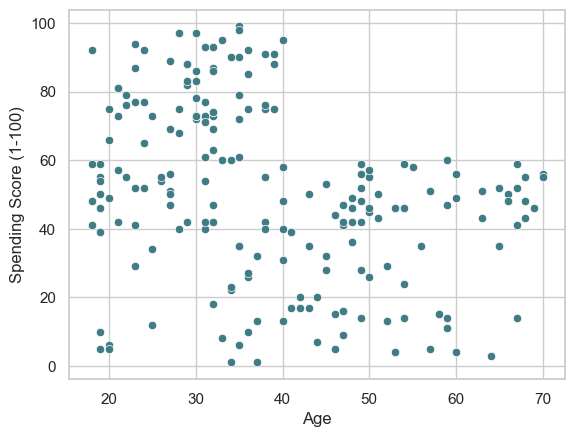

In [16]:
sns.scatterplot(df, x='Age', y='Spending Score (1-100)');

### Deciding K value

In [17]:
X2 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values

In [18]:
inertia = []
for n in range(1 , 15):
    km = KMeans(n_clusters=n, n_init=10, max_iter=300, tol=0.0001, random_state=111).fit(X2)
    inertia.append(km.inertia_)

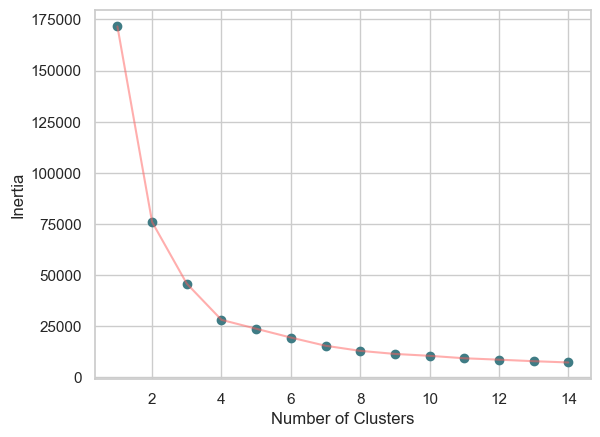

In [20]:
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia'); plt.show()

#### Applying K-Means for k=4

In [21]:
km4 = KMeans(n_clusters=4, n_init=15, max_iter=300, tol=0.0001, random_state=111).fit(X2)

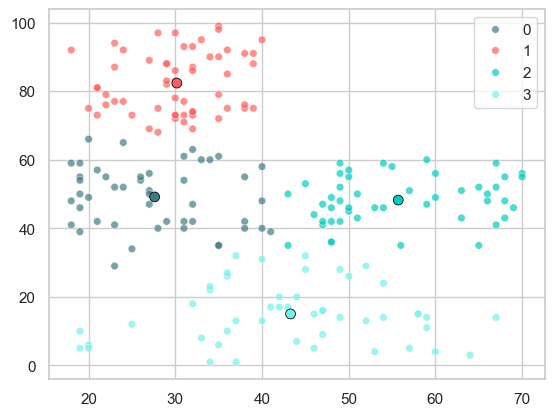

In [22]:
ax = sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=km4.labels_, palette=['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB'], alpha=0.7, s=30, legend="full")
ax = sns.scatterplot(x=km4.cluster_centers_[:,0], y=km4.cluster_centers_[:,1], hue=range(4), palette=['#3F7C85', '#FF5F5D', '#00CCBF', '#72F2EB'], s=50, ec='black', legend=False, ax=ax)

## Predicting Cluster for a new Data Point

In [23]:
sample = np.array([[80, 10], [20, 50], [20,10]])

km4.predict(sample)

array([3, 0, 3])

In [ ]:
# sample = np.array([[80, 110, 60], [20, 20, 50], [20, 10, 10]])

# k3m.predict(sample)

## 3D Clustering Age , Annual Income and Spending Score

In [24]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    km = KMeans(n_clusters = n, n_init=10, random_state = 111).fit(X3)
    inertia.append(km.inertia_)

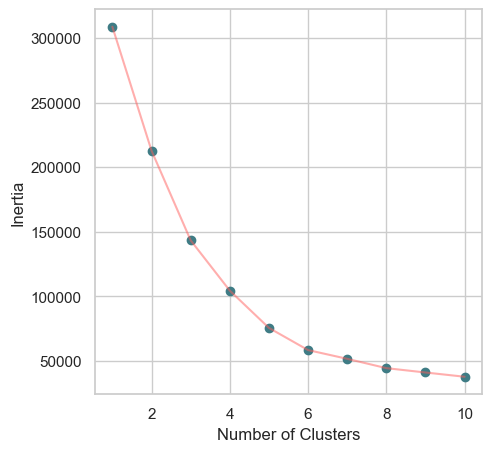

In [25]:
plt.figure(1 , figsize = (5 ,5))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia'); plt.show()

In [26]:
k3m = KMeans(n_clusters=6, n_init=10, random_state=111).fit(X3)

labels3 = k3m.labels_
centroids3 = k3m.cluster_centers_
y_kmeans = k3m.fit_predict(X3)
df['pred_cluster'] = pd.DataFrame(y_kmeans)
df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   cluster  pred_cluster  
0        4             4  
1        3             5  
2        4             4  
3        3             5  
4        4             4

In [27]:
df['pred_cluster'].unique()

array([4, 5, 1, 3, 2, 0])

In [28]:
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['pred_cluster'], 
        size= 10,
        line=dict(
            color= df['pred_cluster'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
    title= 'Clusters wrt Age, Income and Spending Scores',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

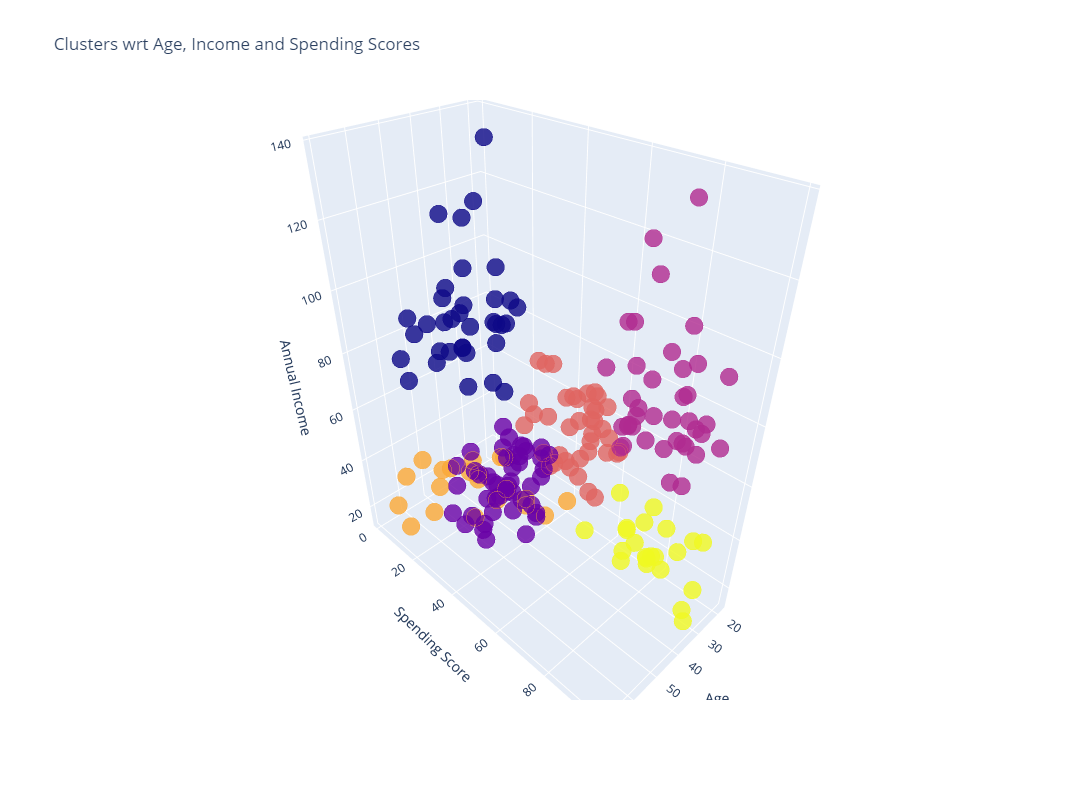

In [29]:
fig = go.Figure(data=data, layout=layout)
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        # pad=4
    ),
)
py.offline.iplot(fig)

## References
 - https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/notebook
 - https://www.kaggle.com/code/fazilbtopal/popular-unsupervised-clustering-algorithms/notebook